# VOTERS REGISTRATION DATASET

## Introduction

There are two datasets: one for 2017 & the other for 2022.
2017:

## Problem Statement

## Objectives

Examine how voter registration changed between 2017 and 2022,

Identify regions with significant growth or decline,

Detect data inconsistencies (e.g., missing codes, duplicate entries, mismatched boundaries), and

Provide actionable insights into voter distribution and participation potential across counties and constituencies.

### Loading Necessary Packages & Data

In [1]:
import pandas as pd
# Load dataset
voters_2017 = pd.read_csv("voters_2017.csv")
voters_2022 = pd.read_csv("voters_2022.csv")

Standardize columns to eliminate the spaces or cases

In [2]:
voters_2017.columns = voters_2017.columns.str.strip().str.lower()
voters_2022.columns = voters_2022.columns.str.strip().str.lower()


In [3]:
voters_2017.head()


,county,constituency,ward,no_of_polling_station,no_of_registered_voters
0,BARINGO,BARINGO CENTRAL,EWALEL/CHAPCHAP,23,8176
1,BARINGO,BARINGO CENTRAL,KABARNET,41,12669
2,BARINGO,BARINGO CENTRAL,KAPROPITA,29,7235
3,BARINGO,BARINGO CENTRAL,SACHO,20,5180
4,BARINGO,BARINGO CENTRAL,TENGES,22,5128


In [4]:
voters_2022.head()

,county,constituency,ward,no_of_polling_station,no_of_registered_voters
0,DIASPORA,DIASPORA,BURUNDI,1,201
1,DIASPORA,DIASPORA,GERMANY,1,314
2,DIASPORA,DIASPORA,RWANDA,2,1090
3,DIASPORA,DIASPORA,SOUTH AFRICA,2,958
4,DIASPORA,DIASPORA,SOUTH SUDAN,2,977


Add the year column to help with grouping and filtering

In [5]:
voters_2017['year'] = 2017
voters_2022['year'] = 2022


For better understanding and side by side comparison, I'll merge the two datasets

In [6]:
merged = voters_2017.merge(
    voters_2022,
    on=['county', 'constituency', 'ward'],
    suffixes=('_2017', '_2022'),
    how='outer' #to retain all rows from both datasets
)

In [7]:
merged

,county,constituency,ward,no_of_polling_station_2017,no_of_registered_voters_2017,year_2017,no_of_polling_station_2022,no_of_registered_voters_2022,year_2022
0,BARINGO,BARINGO CENTRAL,EWALEL/CHAPCHAP,23.0,8176.0,2017.0,24,9551,2022
1,BARINGO,BARINGO CENTRAL,KABARNET,41.0,12669.0,2017.0,44,15204,2022
2,BARINGO,BARINGO CENTRAL,KAPROPITA,29.0,7235.0,2017.0,29,8940,2022
3,BARINGO,BARINGO CENTRAL,SACHO,20.0,5180.0,2017.0,22,6205,2022
4,BARINGO,BARINGO CENTRAL,TENGES,22.0,5128.0,2017.0,23,6020,2022
...,...,...,...,...,...,...,...,...,...
1458,WEST POKOT,POKOT SOUTH,TAPACH,37.0,9609.0,2017.0,39,11742,2022
1459,WEST POKOT,SIGOR,LOMUT,43.0,10079.0,2017.0,44,12395,2022
1460,WEST POKOT,SIGOR,MASOOL,16.0,4966.0,2017.0,23,8187,2022
1461,WEST POKOT,SIGOR,SEKERR,27.0,7524.0,2017.0,38,9432,2022


We have 7 more added rows which could be the new wards added in 2022 for voter registration

Look into the difference in the polling stations and registered voters between 2017 and 2022

In [8]:
#quantify the change/difference in both polling stations and voters
merged['change_polling'] = merged['no_of_polling_station_2022'] - merged['no_of_polling_station_2017']
merged['change_voters'] = merged['no_of_registered_voters_2022'] - merged['no_of_registered_voters_2017']
merged['pct_change_voters'] = (merged['change_voters'] / merged['no_of_registered_voters_2017']) * 100


lets see wards that had a decline in number of registrered voters between 2017 & 2022

In [9]:
merged.describe()
merged[merged['pct_change_voters'] < 0].head()



,county,constituency,ward,no_of_polling_station_2017,no_of_registered_voters_2017,year_2017,no_of_polling_station_2022,no_of_registered_voters_2022,year_2022,change_polling,change_voters,pct_change_voters
46,BOMET,KONOIN,CHEPCHABAS,22.0,10166.0,2017.0,20,9316,2022,-2.0,-850.0,-8.361204
135,DIASPORA,DIASPORA,BURUNDI,2.0,875.0,2017.0,1,201,2022,-1.0,-674.0,-77.028571
139,DIASPORA,DIASPORA,RWANDA,2.0,1184.0,2017.0,2,1090,2022,0.0,-94.0,-7.939189
142,DIASPORA,DIASPORA,TANZANIA,103.0,5528.0,2017.0,3,1402,2022,-100.0,-4126.0,-74.638205
195,GARISSA,DADAAB,DERTU,10.0,3910.0,2017.0,16,3744,2022,6.0,-166.0,-4.245524


There are 5 wards with negative percentage change on registered voters between the two years. This could be due to boundary changes over the years or probably there were missing values not keyed in

Next, converting the merged data into a csv for future analysis. Let's save it

In [10]:
merged.to_csv("voter_changes_2017_2022.csv", index=False)

In [11]:
len(voters_2017), len(voters_2022), len(merged)

(1456, 1463, 1463)

based on the number of rows results : it  means I didn’t lose anything from 2022... all polling centres in 2022 exist in 2017 under exactly the same names.
The extra 7 records in 2022 are new polling centres that didn’t exist in 2017.

Let's see these new stations:

In [12]:
new_centres = voters_2022.merge(
    voters_2017,
    on=['county', 'constituency', 'ward'],
    how='left',
    indicator=True
).query('_merge == "left_only"')[['county', 'constituency', 'ward']]

new_centres.head()

,county,constituency,ward
1,DIASPORA,DIASPORA,GERMANY
4,DIASPORA,DIASPORA,SOUTH SUDAN
5,DIASPORA,DIASPORA,UNITED ARAB EMIRATES
6,DIASPORA,DIASPORA,UNITED KINGDOM
7,DIASPORA,DIASPORA,CANADA


let's see counties with decline in reg voters

In [13]:
decline = merged[merged['no_of_registered_voters_2022'] < merged['no_of_registered_voters_2017']]
decline[['county', 'constituency', 'ward', 
         'no_of_registered_voters_2017', 
         'no_of_registered_voters_2022']]


,county,constituency,ward,no_of_registered_voters_2017,no_of_registered_voters_2022
46,BOMET,KONOIN,CHEPCHABAS,10166.0,9316
135,DIASPORA,DIASPORA,BURUNDI,875.0,201
139,DIASPORA,DIASPORA,RWANDA,1184.0,1090
142,DIASPORA,DIASPORA,TANZANIA,5528.0,1402
195,GARISSA,DADAAB,DERTU,3910.0,3744
201,GARISSA,FAFI,JARAJILA,3378.0,3123
203,GARISSA,GARISSA TOWNSHIP,GALBET,17630.0,16698
205,GARISSA,GARISSA TOWNSHIP,TOWNSHIP,13862.0,13419
206,GARISSA,GARISSA TOWNSHIP,WABERI,12267.0,11657
358,KERICHO,BELGUT,CHAIK,10897.0,10584


Could be negative changes in voters (likely boundary or data issues)

In [14]:
#county level change summary
county_summary = (
    merged.groupby('county')[['no_of_registered_voters_2017', 'no_of_registered_voters_2022']]
    .sum()
    .assign(
        change=lambda x: x['no_of_registered_voters_2022'] - x['no_of_registered_voters_2017'],
        percentage_change=lambda x: (x['change'] / x['no_of_registered_voters_2017']) * 100
    )
    .sort_values('percentage_change', ascending=False)
)

county_summary


,no_of_registered_voters_2017,no_of_registered_voters_2022,change,percentage_change
county,,,,
PRISONS,793.0,7483,6690.0,843.631778
WAJIR,162902.0,207758,44856.0,27.535574
TURKANA,191435.0,238528,47093.0,24.599995
MANDERA,175642.0,217030,41388.0,23.563840
GARISSA,163350.0,201473,38123.0,23.338231
WEST POKOT,180232.0,220026,39794.0,22.079320
BARINGO,232258.0,281053,48795.0,21.008964
SAMBURU,82787.0,100014,17227.0,20.808823
MIGORI,388633.0,469019,80386.0,20.684296


overall voters growth

In [15]:
total_2017 = merged['no_of_registered_voters_2017'].sum()
total_2022 = merged['no_of_registered_voters_2022'].sum()
growth = total_2022 - total_2017
pct_growth = (growth / total_2017) * 100

print(f"Total 2017 voters: {total_2017:,}")
print(f"Total 2022 voters: {total_2022:,}")
print(f"Change: {growth:,} ({pct_growth:.2f}%)")


Total 2017 voters: 19,611,423.0
Total 2022 voters: 22,120,458
Change: 2,509,035.0 (12.79%)


VISUALIZATIONS

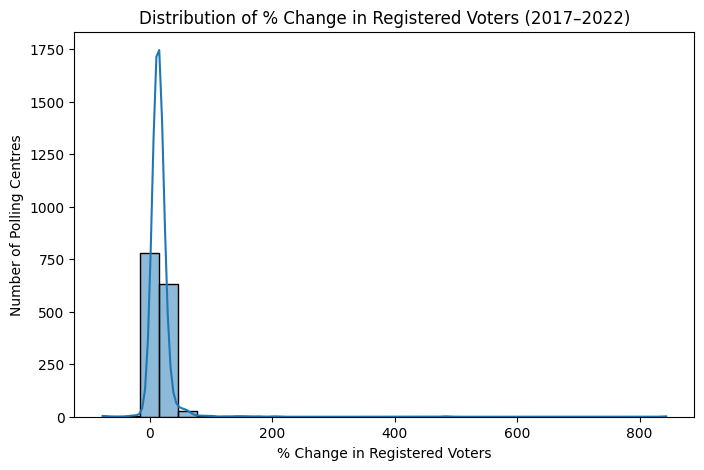

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(merged['pct_change_voters'], bins=30, kde=True)
plt.title('Distribution of % Change in Registered Voters (2017–2022)')
plt.xlabel('% Change in Registered Voters')
plt.ylabel('Number of Polling Centres')
plt.show()


INTERPRETATION:shows that most polling centres had small or modest voter increases hence clustered tightly around zero or low growth & few centres saw huge jumps in voter registration.Safe to say there was imbalanced growth. My thoughts: this is due to uneven voter mobilization

Voter Growth vs Polling Change

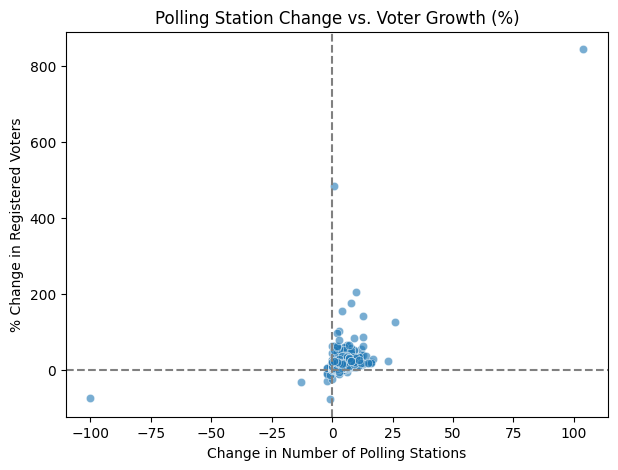

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged, x='change_polling', y='pct_change_voters', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Polling Station Change vs. Voter Growth (%)')
plt.xlabel('Change in Number of Polling Stations')
plt.ylabel('% Change in Registered Voters')
plt.show()


INTERPRETATION: healthy growth cause more stations and more voters although not sooo many but also decline in stations and reg voters

MAPPING AND GEOSPATIAL ANALYSIS 

I'm thinking of having a choropleth map & in the long ran having an interactive map.
SO, first things first, I'll need the kenya counties shapefiles.

In [18]:
import geopandas as gpd
# read county shapefile
kenya_counties = gpd.read_file(r"County.shp")

In [19]:
#Check your GeoDataFrame of the shapefiles
kenya_counties.head()


,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4..."
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."


In [20]:
# Ensure the county names match by standardizing the county names
kenya_counties['county'] = kenya_counties['COUNTY'].str.upper()  # replace 'COUNTY' if needed
merged['county'] = merged['county'].str.upper()


In [21]:
#Aggregate your data by county
county_summary = (
    merged.groupby('county')[['no_of_registered_voters_2017', 'no_of_registered_voters_2022']]
    .sum()
    .assign(
        change=lambda x: x['no_of_registered_voters_2022'] - x['no_of_registered_voters_2017'],
        percentage_change=lambda x: (x['change'] / x['no_of_registered_voters_2017']) * 100
    )
    .reset_index()
)


In [22]:
#Merge voters data with shapefile
map_data = kenya_counties.merge(county_summary, on='county', how='left')


In [23]:
 #confirm the merging is successful. It should display county names and the voter growth percentages.
map_data[['county', 'percentage_change']].head()


,county,percentage_change
0,TURKANA,24.599995
1,MARSABIT,17.785870
2,MANDERA,23.563840
3,WAJIR,27.535574
4,WEST POKOT,22.079320


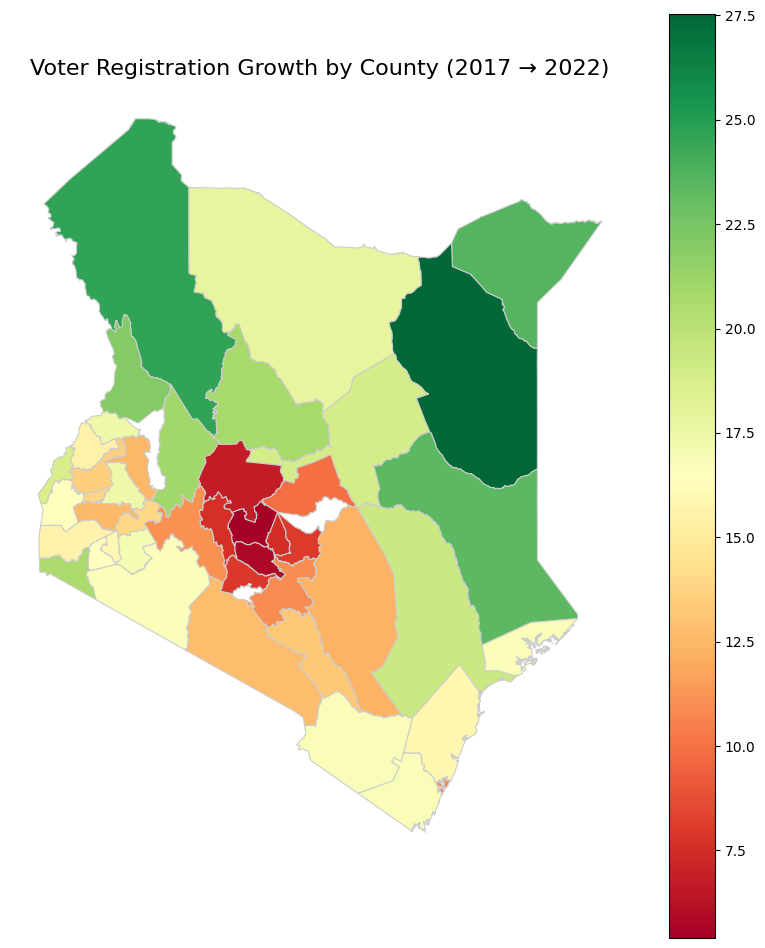

In [24]:
#lets plot the choropleth map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 12))
map_data.plot(
    column='percentage_change',    # color by growth %
    cmap='RdYlGn',                 # red = decline, green = growth
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)
ax.set_title("Voter Registration Growth by County (2017 → 2022)", fontsize=16)
ax.axis('off')
plt.show()


Make the map interactive using folium so that users can hover over counties to see exact growth percentages.

In [25]:
import folium

# Convert merged GeoDataFrame to GeoJSON
map_geojson = map_data.to_json()


In [26]:
# Create a Folium map centered on Kenya
m = folium.Map(location=[0.5, 37.5], zoom_start=6, tiles='cartodbpositron')


In [27]:
#add choropleth layer
folium.Choropleth(
    geo_data=map_geojson,
    name='choropleth',
    data=map_data,
    columns=['county', 'percentage_change'],
    key_on='feature.properties.county',
    fill_color='RdYlGn',   # red = decline, green = growth
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Voter Registration % Change (2017 → 2022)',
).add_to(m)



In [28]:
# Define the hover tooltip
tooltip = folium.GeoJsonTooltip(
    fields=['county', 'no_of_registered_voters_2017', 'no_of_registered_voters_2022', 'percentage_change'],
    aliases=['County:', '2017 voters:', '2022 voters:', '% Change:'],
    localize=True
)

# Add GeoJson layer with the hover tooltips
folium.GeoJson(
    map_geojson,
    name='Voter Growth',
    tooltip=tooltip
).add_to(m)


In [34]:
m
m.save("voter_growth_map.html")